In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme('notebook', 'white')
sns.set_context("notebook", font_scale=1.2)

# escolhe exemplares
NORMAL = '../mafaulda_reduced/normal/0_fft.csv'
DESBALANCEAMENTO = '../mafaulda_reduced/imbalance/35g_fft.csv'
DESALINHAMENTO_VERTICAL = '../mafaulda_reduced/vertical-misalignment/1.90mm_fft.csv'
DESALINHAMENTO_HORIZONTAL = '../mafaulda_reduced/horizontal-misalignment/1.5mm_fft.csv'

EXAMPLES = [
    ['Normal', NORMAL],
    ['Desbalanceamento', DESBALANCEAMENTO],
    ['Desalinhamento Vertical', DESALINHAMENTO_HORIZONTAL],
    ['Desalinhametno horizontal', DESALINHAMENTO_VERTICAL]
]

In [3]:
def corrige_nome_eixos(nome):
    return nome.replace('rad', 'Radial ').replace('tg', 'Tangencial ').replace('ax', 'Axial')

def plot_waterfall(file_path, axis='tg1', strides=5, n_harmonics=2, ax=None, titulo=None):
    df = pd.read_csv(file_path)
    df_axis = df.pivot(index='freq_ax', columns='rotacao_manual', values=axis)[0:(60*n_harmonics)]
    
    if ax is None:
        fig = plt.figure(figsize=[14, 7])
        ax = fig.add_subplot(111, projection = '3d')

    x = df_axis.index.values    # frequências
    y = df_axis.columns.values  # rotações
    xv, yv = np.meshgrid(x, y)
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    z = df_axis.values.T**2 * 1e3

    ax.set_xlabel("Frequência (Hz)",labelpad=10)
    ax.set_ylabel("Rotação (Hz)",labelpad=10)
#     ax.set_zlabel(corrige_nome_eixos(axis))
    ax.set_zlabel(r"Espectro de energia ($ \times 10^{-3} g^2$)", labelpad=12)
    ax.set_title(titulo)
    
    for i in range(1, n_harmonics+1):
        ax.plot([10*i, 60*i], [10, 60], zs=0, zdir='z', color='black', linewidth=0.5)
    
    n_rotations = y.shape[0]
    for r in range(0, n_rotations, strides):
        ax.plot(xv[r,:], yv[r,:], z[r,:], linewidth=0.6*(1-0.8*r/n_rotations), color=[0.7*(r/n_rotations), 0.4*(1-r/n_rotations),0])

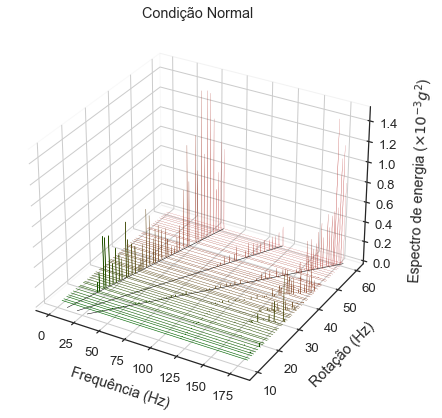

In [51]:
plot_waterfall(NORMAL, 'tg1', strides=1, n_harmonics=3, titulo='Condição Normal')

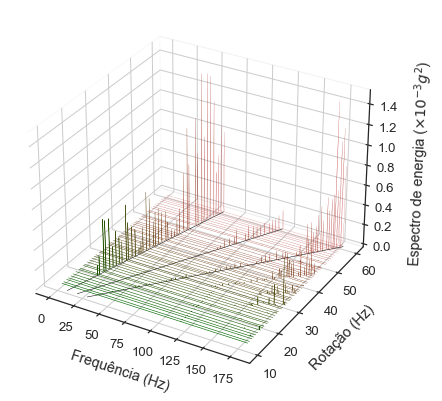

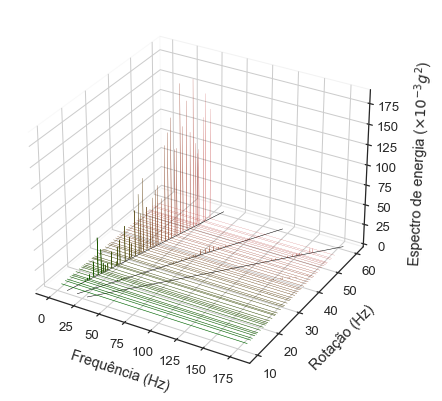

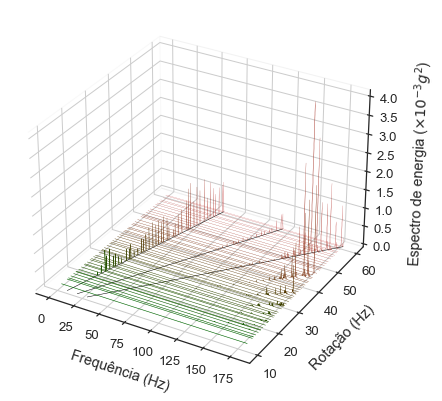

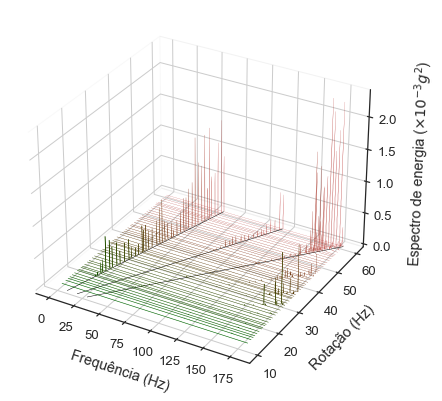

In [52]:
plot_waterfall(NORMAL, 'tg1', strides=1, n_harmonics=3)
plt.savefig('../redacao/figuras/waterfall_normal.pdf', bbox_inches='tight')

plot_waterfall(DESBALANCEAMENTO, 'tg1', strides=1, n_harmonics=3)
plt.savefig('../redacao/figuras/waterfall_desbal.pdf', bbox_inches='tight')

plot_waterfall(DESALINHAMENTO_VERTICAL, 'tg1', strides=1, n_harmonics=3)
plt.savefig('../redacao/figuras/waterfall_desver.pdf', bbox_inches='tight')

plot_waterfall(DESALINHAMENTO_HORIZONTAL, 'tg1', strides=1, n_harmonics=3)
plt.savefig('../redacao/figuras/waterfall_deshor.pdf', bbox_inches='tight')

# plt.close()

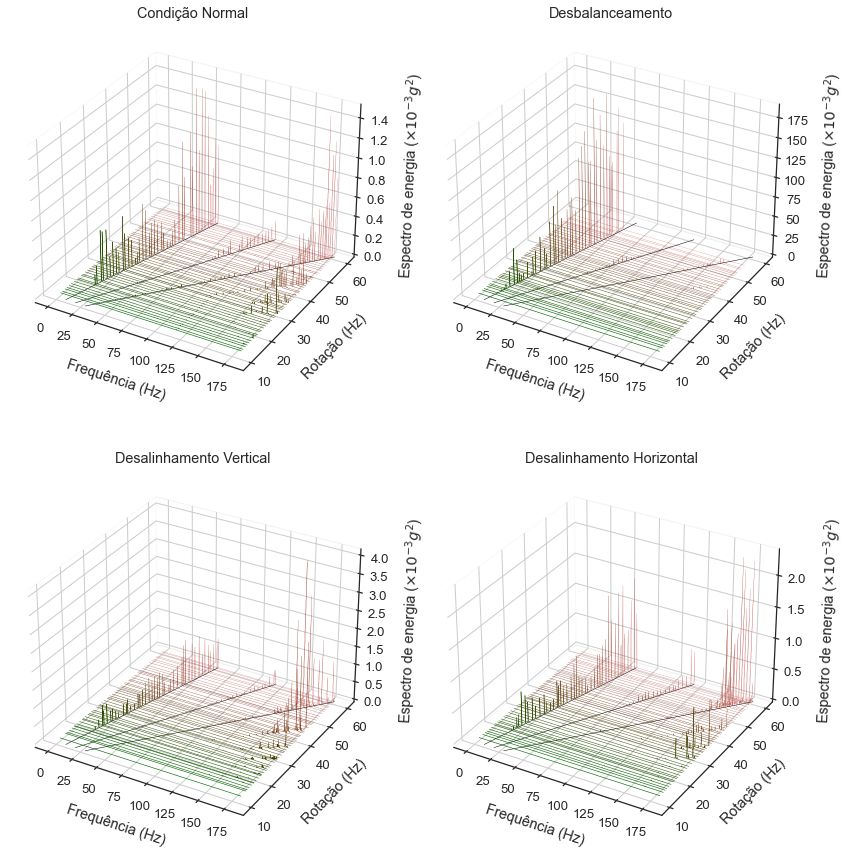

In [53]:
fig = plt.figure(figsize=[15, 15])

ax = fig.add_subplot(2, 2, 1, projection='3d')
plot_waterfall(NORMAL, 'tg1', strides=1, n_harmonics=3, ax=ax, titulo='Condição Normal')

ax = fig.add_subplot(2, 2, 2, projection='3d')
plot_waterfall(DESBALANCEAMENTO, 'tg1', strides=1, n_harmonics=3, ax=ax, titulo='Desbalanceamento')

ax = fig.add_subplot(2, 2, 3, projection='3d')
plot_waterfall(DESALINHAMENTO_VERTICAL, 'tg1', strides=1, n_harmonics=3, ax=ax, titulo='Desalinhamento Vertical')

ax = fig.add_subplot(2, 2, 4, projection='3d')
plot_waterfall(DESALINHAMENTO_HORIZONTAL, 'tg1', strides=1, n_harmonics=3, ax=ax, titulo='Desalinhamento Horizontal')

plt.subplots_adjust(wspace = 0)

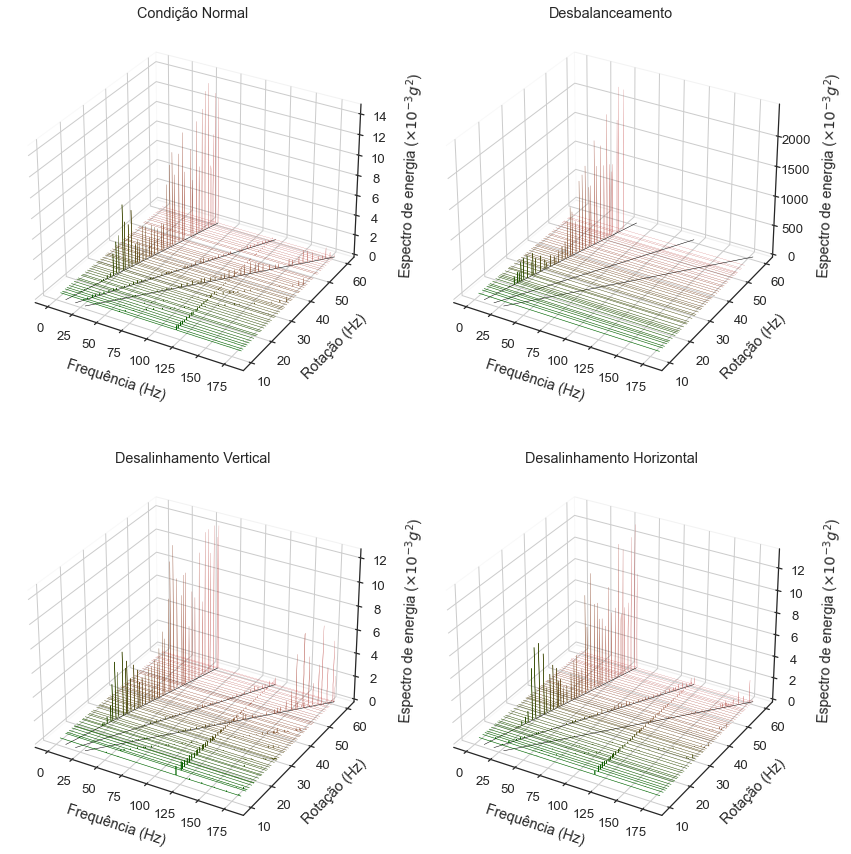

In [8]:
fig = plt.figure(figsize=[15, 15])

ax = fig.add_subplot(2, 2, 1, projection='3d')
plot_waterfall(NORMAL, 'rad1', strides=1, n_harmonics=3, ax=ax, titulo='Condição Normal')

ax = fig.add_subplot(2, 2, 2, projection='3d')
plot_waterfall(DESBALANCEAMENTO, 'rad1', strides=1, n_harmonics=3, ax=ax, titulo='Desbalanceamento')

ax = fig.add_subplot(2, 2, 3, projection='3d')
plot_waterfall(DESALINHAMENTO_VERTICAL, 'rad1', strides=1, n_harmonics=3, ax=ax, titulo='Desalinhamento Vertical')

ax = fig.add_subplot(2, 2, 4, projection='3d')
plot_waterfall(DESALINHAMENTO_HORIZONTAL, 'rad1', strides=1, n_harmonics=3, ax=ax, titulo='Desalinhamento Horizontal')

plt.subplots_adjust(wspace = 0)

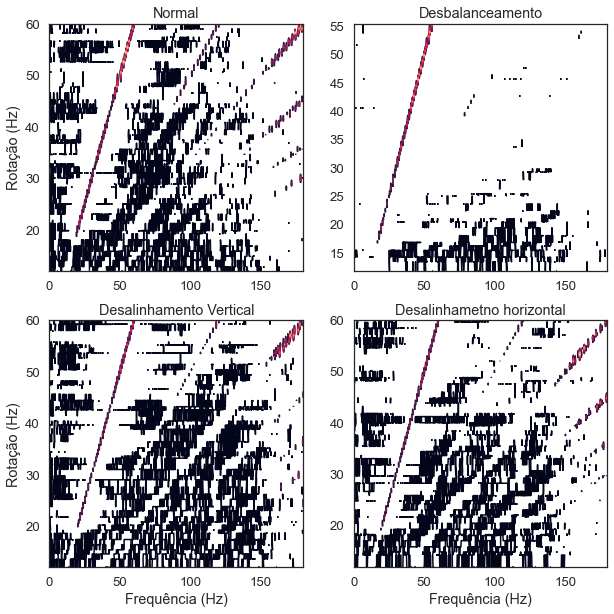

In [15]:
def plot_colormesh(experiment, ax, axis='tg1', strides=5, n_harmonics=2):
    df = pd.read_csv(experiment[1])
    df_axis = df.pivot(index='freq_ax', columns='rotacao_manual', values=axis)[0:(60*n_harmonics)]

    x = df_axis.index.values    # frequências
    y = df_axis.columns.values  # rotações
    xv, yv = np.meshgrid(x, y)

    z = df_axis.values.T
    im = ax.contour(x,y,z)
    ax.set_title(experiment[0])


fig, axs = plt.subplots(2, 2, figsize=[10, 10])

for i in range(2):
    for j in range(2):
        plot_colormesh(EXAMPLES[2*i+j], axs[i][j], 'tg1', strides=1, n_harmonics=3)
        axs[1][j].set_xlabel("Frequência (Hz)")
        
    axs[i][0].set_ylabel("Rotação (Hz)")